### Create directory and upload urls file into your server

In [54]:
from fastai import *
from fastai.vision import *

## Download images

In [175]:
search_dict = {
    'shipping containers':
    ['flatrack',
     'general container',
     'opentop container',
     'refrigerated container'
    ]}


In [66]:
# classes = ['flatrack','general','opentop','refrigerated']
path = Path('data/containers')

In [67]:
import requests
from bs4 import BeautifulSoup
import urllib
import json

In [68]:
def get_search_string_dict(search_dict):
    
    search_string_dict = {}
    
    for key, keywords_list in search_dict.items():
        for i, keyword in enumerate(keywords_list):
            tmp = keywords_list[i]
            tmp_list = keywords_list.copy()
            tmp_list.remove(tmp_list[i])
        
            search_string = tmp + ' -' + ' -'.join([f'"{keyword}"' for keyword in tmp_list]) + f' :"{key}"' # to make precise search, filter unwanted result, and give good context
            search_string_dict[keyword] = search_string
    return search_string_dict

In [69]:
def get_page(search_string):
    base_url = 'https://www.google.com/search?tbm=isch&q='
    header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"
    }
    page = requests.request('GET', base_url + search_string, headers=header)
    return page

In [70]:
def extract_text(x):
    return dict(json.loads(x.text))['ou']

In [71]:
def get_images_urls(page):
    soup = BeautifulSoup(page.content, "lxml")
    html = soup.select('.rg_di .rg_meta')
    urls =  list(map(extract_text, html))
    return urls      

In [176]:
search_string_dict = get_search_string_dict(search_dict);

In [177]:
classes = []
for key in search_string_dict.keys():
    classes.append(key)
classes[-2:]
    

['opentop container', 'refrigerated container']

In [107]:
search_string_dict[classes[0]] # a sample search string

'flatrack -"general container" -"opentop container" -"refrigerated container" :"shipping containers"'

In [108]:
path = Path('data/containers')
path.mkdir(exist_ok=True)

In [76]:
for bar,key in enumerate(progress_bar(classes)):
    
    search_string_base = search_string_dict[key]
    urls_list = []
    for i in range(1,10):
        x = f'&ijn={i}&start={i}00'
        x = search_string_base + x;
        x = get_page(x)

        urls = get_images_urls(x)    
        urls = pd.DataFrame(urls)
        urls_list.append(urls)
#         print(urls.shape)
        
    urls_list = pd.concat(urls_list, axis=0)
    print(urls_list.shape)
    urls_list.to_csv(path/f'{key}.txt', index=False, header=False) # To match the format for download_images.

    # import time
    # time.sleep(5) # Delays for 5 seconds. If you are doing a lot of scraping, try not to scrape too fast.

(583, 1)
(673, 1)
(591, 1)
(652, 1)


In [172]:
i = 0

In [180]:
for _,class_name in enumerate(classes[i:]): 
    
    folder = class_name
    file = f'{class_name}.txt'
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    print(file)
    download_images(path/file, dest, max_pics=600, max_workers=6)
    # To keep track of i, so I can re-run the cell if it stuck at 99% sometimes.
    # If i interupt the process, re-run this cell should start at the last class that I am downloading.
    i = i + 1

general container.txt


Error http://www.shippingcontainers24.com/wp-content/uploads/2011/11/40-foot-shipping-container.png HTTPConnectionPool(host='www.shippingcontainers24.com', port=80): Max retries exceeded with url: /wp-content/uploads/2011/11/40-foot-shipping-container.png (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f9520c5d128>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
Error http://www.shippingcontainers24.com/wp-content/uploads/2011/11/flatrack_container.jpg HTTPConnectionPool(host='www.shippingcontainers24.com', port=80): Max retries exceeded with url: /wp-content/uploads/2011/11/flatrack_container.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f952087e550>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
Error http://www.fr8.vu/images/containers.jpg HTTPConnectionPool(host='www.fr8.vu', port=80): Read timed out. (read timeout=4)
Error https:/

Error https://www.zim.com/media/1869/container_dry-van-hc.jpg?anchor=center&mode=crop&width=800&height=500&rnd=131654525670000000 HTTPSConnectionPool(host='www.zim.com', port=443): Read timed out. (read timeout=4)
Error http://www.shippingcontainers24.com/wp-content/uploads/2011/11/open_top_container_tarpaulin.jpg HTTPConnectionPool(host='www.shippingcontainers24.com', port=80): Max retries exceeded with url: /wp-content/uploads/2011/11/open_top_container_tarpaulin.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f952872ccc0>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
Error https://www.zim.com/media/1873/container_open-top.jpg?anchor=center&mode=crop&width=800&height=500&rnd=131654525670000000 HTTPSConnectionPool(host='www.zim.com', port=443): Read timed out. (read timeout=4)
Error http://ratshippingcontainers.co.uk/wp-content/uploads/2017/11/Open-Top-Shipping-Container...jpg HTTPConnectionPool(host='ratsh

Error "https://i2.wp.com/ae01.alicdn.com/kf/HTB1ShjZKVXXXXc9XFXXq6xXFXXX3/Second-hand-20-refeer-font-b-container-b-font-with-font-b-refrigeration-b-font-system.jpg_300x300q75.jpg?crop=5,2,900,500&quality=2886" No connection adapters were found for '"https://i2.wp.com/ae01.alicdn.com/kf/HTB1ShjZKVXXXXc9XFXXq6xXFXXX3/Second-hand-20-refeer-font-b-container-b-font-with-font-b-refrigeration-b-font-system.jpg_300x300q75.jpg?crop=5,2,900,500&quality=2886"'
Error http://www.shippingcontainers24.com/wp-content/uploads/2011/11/reefer-container-dimensions.jpg HTTPConnectionPool(host='www.shippingcontainers24.com', port=80): Max retries exceeded with url: /wp-content/uploads/2011/11/reefer-container-dimensions.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f952087e048>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))
Error https://imgusr.tradekey.com/o-B11624501-20180403082941/used-and-new-6m-containers-12m-containers-20f

# Data Scraping 
Images are scraped from Google Image. 
download_images() Credit to Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In [81]:
# for class_name in classes:
#     folder = class_name
#     file = f'{class_name}.txt'
#     dest = path/folder
#     dest.mkdir(parents=True, exist_ok=True)
#     print(file)
#     download_images(path/file, dest, max_pics=400)

Good! Let's take a look at some of our pictures then.

In [182]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

flatrack


cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000164.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000216.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000013.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000177.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000186.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000363.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000349.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000043.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000351.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00000185.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/flatrack/00

cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000152.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000030.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000403.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000271.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000035.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000048.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000569.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000089.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000545.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/0000

/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:771: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000473.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000589.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000332.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000203.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000423.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000079.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000570.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000137.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/00000319.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/general container/0000

cannot identify image file '/home/mediumnok/fastaiv3/data/containers/opentop container/00000426.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/opentop container/00000179.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/opentop container/00000436.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/opentop container/00000456.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/opentop container/00000351.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/opentop container/00000492.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/opentop container/00000240.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/opentop container/00000353.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/opentop container/00000211.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/opentop container/0000

cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000368.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000174.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000166.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000426.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000175.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000524.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000593.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000046.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000446.jpg'
cannot identify image file '/home/mediumnok/fa

/home/mediumnok/.conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000224.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000461.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000563.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000070.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000540.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000283.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000131.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000142.jpg'
cannot identify image file '/home/mediumnok/fastaiv3/data/containers/refrigerated container/00000153.jpg'
cannot identify image file '/home/mediumnok/fa

## View data

In [ ]:
!rm -rf data/containers/.ipynb_checkpoints/

In [ ]:
ls $path -a

In [183]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [184]:
data.classes

['flatrack',
 'general container',
 'opentop container',
 'refrigerated container']

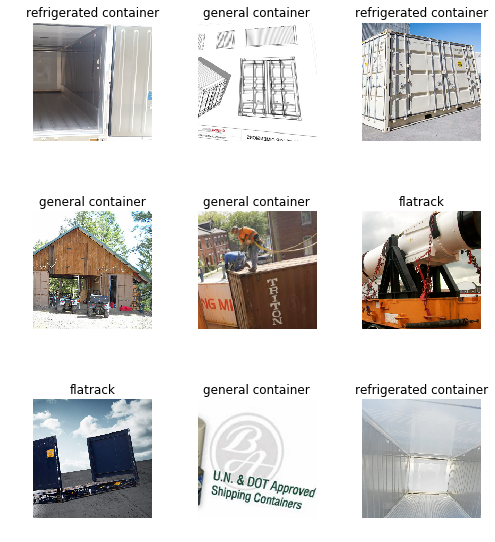

In [185]:
data.show_batch(rows=3, figsize=(7,8))

In [186]:
data.classes, data.c

(['flatrack',
  'general container',
  'opentop container',
  'refrigerated container'],
 4)

## Train model

In [187]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [188]:
data.train_ds
data.valid_ds

DatasetTfm(ImageClassificationBase of len 434)

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


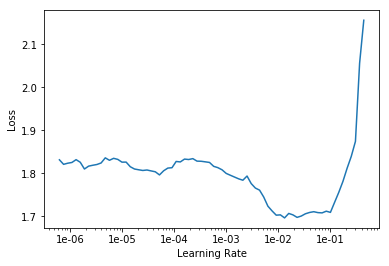

In [189]:
learn.lr_find()
learn.recorder.plot()

In [190]:
learn.fit_one_cycle(4)

Total time: 02:44
epoch  train_loss  valid_loss  error_rate
1      1.587376    1.339294    0.541475    (00:40)
2      1.450834    1.293803    0.509217    (00:40)
3      1.314218    1.272472    0.534562    (00:40)
4      1.222212    1.271739    0.534562    (00:42)



In [191]:
learn.fit_one_cycle(4)

Total time: 02:46
epoch  train_loss  valid_loss  error_rate
1      1.112294    1.238997    0.513825    (00:41)
2      1.106551    1.272913    0.523041    (00:41)
3      1.091322    1.260431    0.516129    (00:42)
4      1.023314    1.254391    0.509217    (00:41)



In [192]:
learn.save('stage-1-containers')

In [193]:
learn.unfreeze()

In [194]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


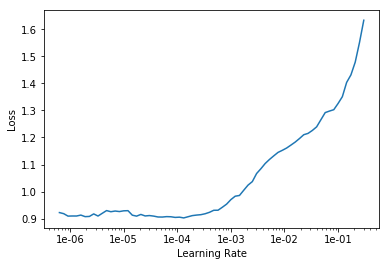

In [195]:
learn.recorder.plot()

In [196]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 01:24
epoch  train_loss  valid_loss  error_rate
1      0.946616    1.258499    0.513825    (00:41)
2      0.915075    1.237015    0.500000    (00:42)



In [197]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

Total time: 01:24
epoch  train_loss  valid_loss  error_rate
1      0.882173    1.247532    0.495392    (00:42)
2      0.861782    1.248477    0.497696    (00:42)



In [198]:
learn.save('stage-2-containers')

In [199]:
learn.load('stage-2-containers')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f9505a56ba8>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

## Interpretation

In [200]:
interp = ClassificationInterpretation.from_learner(learn)

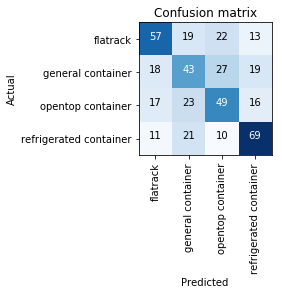

In [201]:
interp.plot_confusion_matrix()

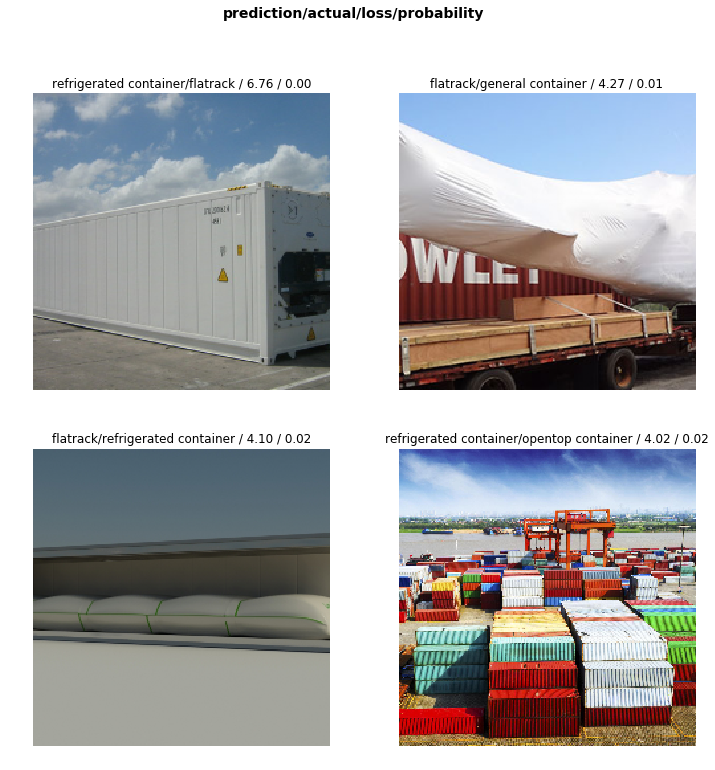

In [202]:
interp.plot_top_losses(4)

#### You can see for the first exmaple, the model is quite sure it is a regrigerated container, but the label is actually flatrack. In this case, the model is actually correct and it is a mis-label

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageDeleter` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

First we need to get the file paths from our top_losses. Here's a handy function that pulls out all our top_losses:

In [203]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

Now we can pass in these paths to our widget.

In [204]:
fd = ImageDeleter(data, idxs)


Button(button_style='primary', description='Confirm', style=ButtonStyle())

Flag photos for deletion by clicking 'Delete'. Then click 'Confirm' to delete flagged photos and keep the rest in that row. The `File_Deleter` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses`.

# Retrain

In [ ]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
learn = create_cnn(data, models.resnet34, metrics=error_rate)

learn.fit_one_cycle(6)

learn.save('stage-1-containers')

learn.load('stage-1-containers')

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

learn.fit_one_cycle(3, max_lr=slice(1e-5,1e-4))
learn.save('stage-2-containers')
learn.load('stage-2-containers')

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(4)

## Putting your model in production

In [135]:
data.classes

['flatrack',
 'general container',
 'opentop container',
 'refrigerated container']

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [60]:
# fastai.defaults.device = torch.device('cpu')

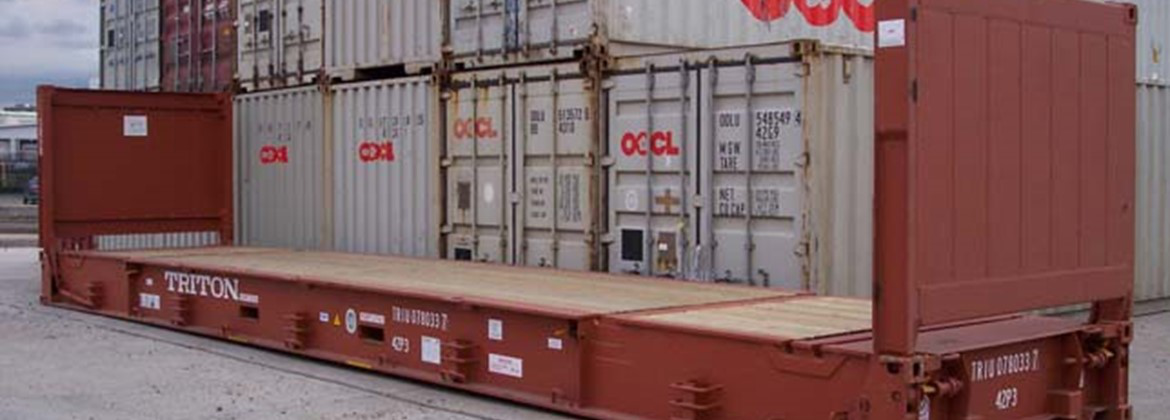

In [181]:
img = open_image(path/'flatrack'/'00000009.jpg')
img

In [215]:
1

1

In [139]:
classes = ['flatrack', 'general', 'opentop', 'refrigerated']
data2 = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2-containers')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f9520599320>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [140]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

'flatrack'

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

# Train more after delete some mislabel data/bad data

In [160]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [161]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [162]:
learn.load('stage-2-containers')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f9520ab22b0>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1

In [163]:
learn.lr_find()


LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


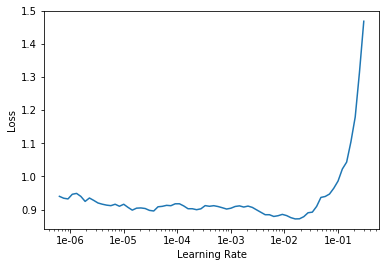

In [164]:
learn.recorder.plot()

In [165]:
lr = 1e-3
lrs = [lr, lr/5]

In [168]:
learn.fit_one_cycle(5, slice(*lrs))

Total time: 01:26
epoch  train_loss  valid_loss  error_rate
1      0.924400    0.846404    0.342857    (00:17)
2      0.932144    0.851542    0.335714    (00:17)
3      0.926489    0.860259    0.342857    (00:17)
4      0.889862    0.855853    0.350000    (00:17)
5      0.872053    0.861510    0.335714    (00:16)

